###                                                         __Linear Regression__
###### __Step For Perform Linear Regression In Machine Learning__

In [1]:
#import All Require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#Import The Dataset
com = pd.read_csv("https://raw.githubusercontent.com/hi10vi10/ML-practice/main/1000_Companies.csv")
com.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Some Basic Function To Know About Dataset
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
#Some Basic Function To Know About Dataset
com.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
#Some Basic Function To Know About Dataset
com.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
#Convert Dtaset into Categorical data to  Numeric Data
com.replace({'State':{'New York':0,'California':100000,'Florida':200000}},inplace=True) 
com

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,0,192261.83000
1,162597.70,151377.590,443898.5300,100000,191792.06000
2,153441.51,101145.550,407934.5400,200000,191050.39000
3,144372.41,118671.850,383199.6200,0,182901.99000
4,142107.34,91391.770,366168.4200,200000,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,100000,95279.96251
996,134970.00,130390.080,329204.0228,100000,164336.60550
997,100275.47,241926.310,227142.8200,100000,413956.48000
998,128456.23,321652.140,281692.3200,100000,333962.19000


In [7]:
#Extracting the Independent and Dependent variables
x = com.iloc[:,:-1].values
y = com.iloc[: , 4].values
#Independent Dataset : 'R&D Spend', 'Administration', 'Marketing Spend', 'State'
print(x)

[[165349.2  136897.8  471784.1       0.  ]
 [162597.7  151377.59 443898.53 100000.  ]
 [153441.51 101145.55 407934.54 200000.  ]
 ...
 [100275.47 241926.31 227142.82 100000.  ]
 [128456.23 321652.14 281692.32 100000.  ]
 [161181.72 270939.86 295442.17      0.  ]]


In [8]:
#Dependent Dataset : 'Profit'
print(y)

[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0761   72337.96774 169566.5772
 158670.9451  114522.8756   85842.60573 101106.2297   59328.81874
 157142.6178   68669.64059 177717.3712   94409.4396  183945.1553
  82484.38635 144515.3371  105333.2634  122331.0988  168459.4156
  60947.70089 162733.9549  181574.4968   7357

<Axes: >

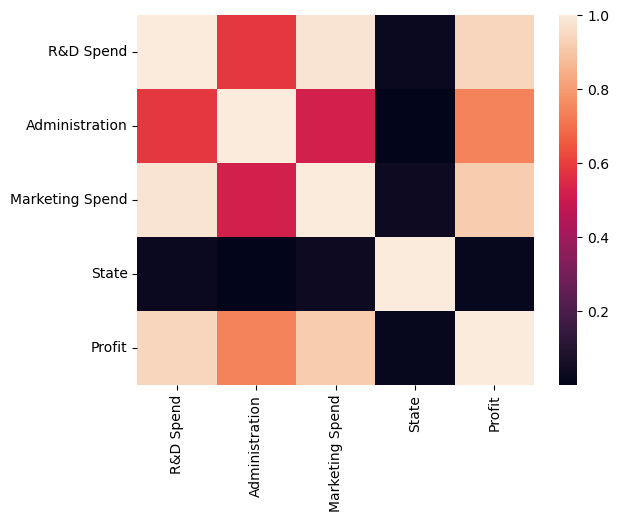

In [9]:
# Building the Correlation matrix
sns.heatmap(com.corr())

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89277.46608138,  87913.98543023,  94381.29403027, 175953.47820842,
        83687.79165929, 110846.71224968, 132329.91508248,  90960.15044159,
       164869.37567223,  53501.07800773,  66438.09328543, 150840.20758548,
       126400.3493903 ,  58826.11310776, 176996.72077356,  75592.7155431 ,
       118523.40035278, 164057.81323167, 171286.06055536, 182340.63355903,
       119240.98116036,  85156.99167115, 181264.96025718,  83632.19298529,
       104491.98763578, 100719.8914206 ,  54177.77611156,  57158.69796938,
        68384.20660309, 209506.3590777 , 121053.86243786, 111210.71204333,
       101763.13407034, 138233.37490541,  63458.00001146, 108343.88465934,
       186286.06069438, 171715.44747111, 174916.92398985, 117946.77412901,
        97006.82631369, 164935.62359319, 107210.36804254,  50472.93258476,
       116789.23148749,  58120.77575459, 158689.87442149,  78818.5703798 ,
       160001.01246946, 131412.5395858 , 185152.8964554 , 174881.74298721,
        93232.33210442,  

In [13]:
# Calculating the Coefficients
print(regressor.coef_)
# Calculating the Intercept
print(regressor.intercept_)

[ 0.52691188  0.84596766  0.1068806  -0.0009078 ]
-51582.2063552943


In [14]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9117977860104947

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


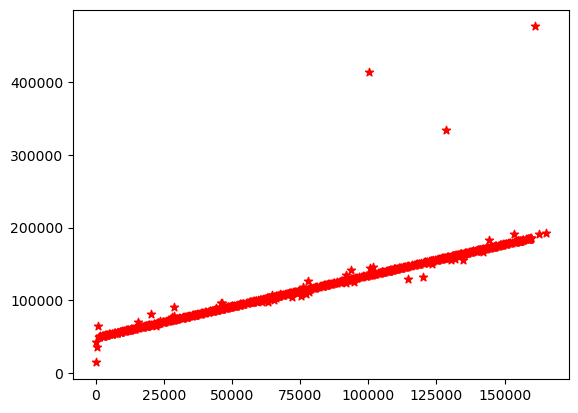

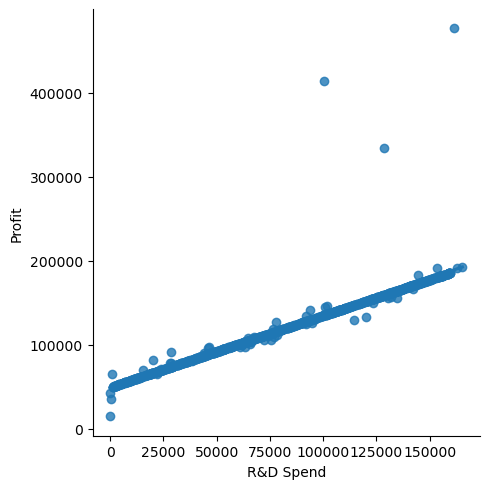

In [15]:
# Some Visualization
plt.scatter(com["R&D Spend"],com["Profit"],marker="*",c="r")
sns.lmplot(x="R&D Spend",y="Profit",
            ci = None, 
            data = com) 

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


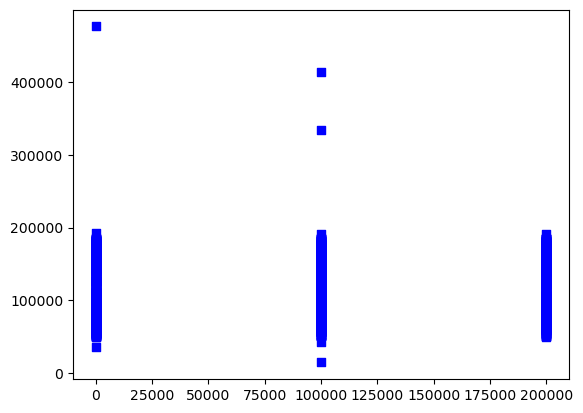

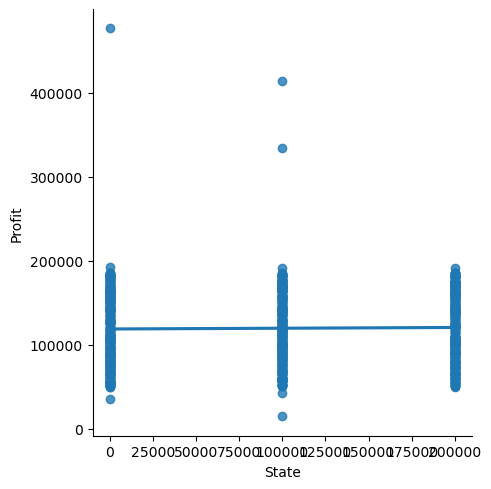

In [16]:
plt.scatter(com["State"],com["Profit"],marker="s",c="b")
sns.lmplot(x="State",y="Profit",
            ci = None, 
            data = com)

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


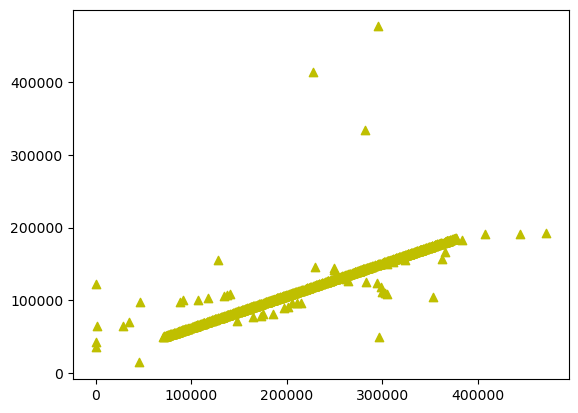

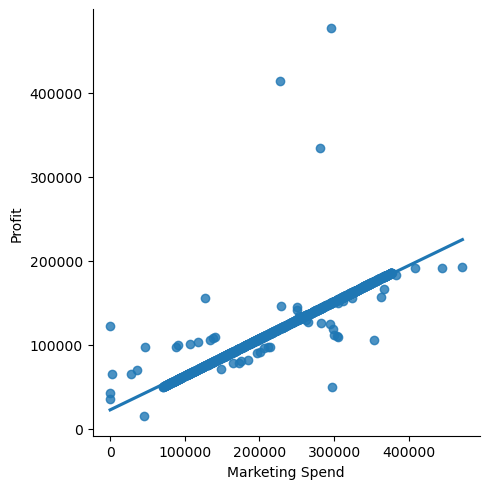

In [17]:
plt.scatter(com["Marketing Spend"],com["Profit"],marker="^",c="y")
sns.lmplot(x="Marketing Spend",y="Profit",
            ci = None, 
            data = com)

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


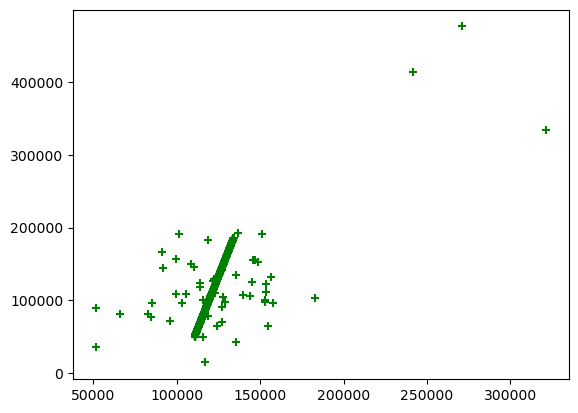

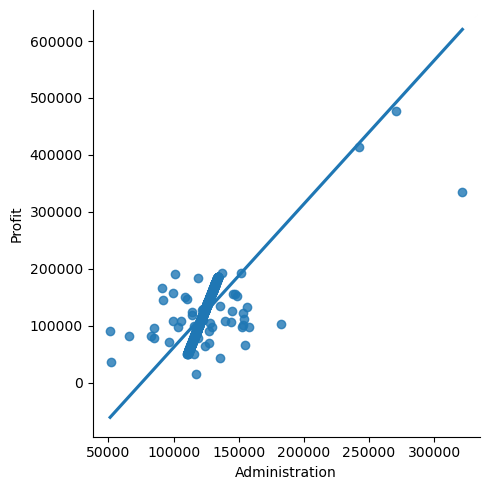

In [18]:
plt.scatter(com["Administration"],com["Profit"],marker="+",c="g")
sns.lmplot(x="Administration",y="Profit",
            ci = None, 
            data = com) 